# RED NEURONAL CONVOLUCIONAL - PREDICCIÓN DE EXPRESIONES FACIALES



## Descripción del dataset
Descripción del Dataset: AffectNet

AffectNet es uno de los datasets más grandes y completos diseñados específicamente para el análisis de emociones, expresiones faciales y afecto en imágenes. Fue introducido para facilitar la investigación en el campo del reconocimiento automático de emociones y el análisis de expresiones faciales en imágenes naturales. Este conjunto de datos contiene una amplia variedad de imágenes de rostros etiquetadas con categorías emocionales, dimensiones afectivas y puntos de referencia faciales.

Enlace de descarga: [Dataset de Kaggle](https://www.kaggle.com/datasets/noamsegal/affectnet-training-data)

Características principales:

    Cantidad de datos:
        Contiene más de 1 millón de imágenes faciales recolectadas de Internet.
        Aproximadamente 450,000 imágenes etiquetadas manualmente por expertos.

    Etiquetas emocionales:
        Las imágenes están categorizadas en 8 emociones básicas:
            Neutral
            Felicidad
            Tristeza
            Sorpresa
            Miedo
            Disgusto
            Enojo
            Desprecio
        También incluye una categoría adicional para expresiones ambiguas o desconocidas.

    Dimensiones afectivas:
        Se etiquetan con valores continuos para valencia y excitación:
            Valencia: Representa si una emoción es positiva o negativa.
            Excitación: Representa el nivel de activación emocional (de tranquilo a excitado).

    Anotaciones adicionales:
        Coordenadas de puntos de referencia faciales (landmarks faciales) para facilitar el análisis estructural de las expresiones.
        Posibles etiquetas de poses faciales, oclusión y calidad de la imagen.

    Variabilidad en las imágenes:
        Incluye imágenes con diferentes condiciones:
            Iluminación
            Ángulos de pose
            Contextos culturales
            Edades
            Géneros
        Algunas imágenes contienen oclusiones parciales como gafas, manos o máscaras.

    Propósito y uso:
        El dataset se utiliza para tareas como:
            Reconocimiento automático de emociones.
            Detección de expresiones faciales.
            Análisis dimensional del afecto.
            Entrenamiento y validación de modelos de deep learning.

    Formato de los datos:
        Las imágenes se encuentran en formato estándar (JPEG/PNG).
        Los metadatos, como etiquetas y coordenadas de puntos de referencia, están en archivos separados en formato CSV o JSON.

## Importación de datos

### Importación de la biblioteca de descarga del dataset de expresiones faciales

In [6]:
%pip install numpy matplotlib pandas kagglehub opencv-python seaborn scikit-learn tensorflow

### Importación de librerías para el código

In [7]:
import os   # type: ignore
import shutil # type: ignore
import math # type: ignore
from collections import Counter # type: ignore
import random   # type: ignore
import json # type: ignore
import numpy as np  # type: ignore
import pandas as pd # type: ignore
import seaborn as sns   # type: ignore
import kagglehub    # type: ignore
import matplotlib.pyplot as plt # type: ignore
import cv2  # type: ignore
import tensorflow as tf # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0, EfficientNetB1, EfficientNetB3, ResNet50 # type: ignore
from tensorflow.keras.regularizers import l2  # type: ignore
from tensorflow.keras.models import Sequential, Model, load_model # type: ignore
from tensorflow.keras.layers import ReLU, Add, MultiHeadAttention, Layer, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D, SpatialDropout2D, Multiply, LeakyReLU # type: ignore
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint  # type: ignore
from tensorflow.keras.optimizers import Adam, AdamW, SGD  # type: ignore
from tensorflow.keras.activations import swish, relu  # type: ignore
from tensorflow.keras.optimizers.schedules import LearningRateSchedule, CosineDecayRestarts, CosineDecay  # type: ignore
from keras.saving import register_keras_serializable  # type: ignore
from sklearn.metrics import classification_report, confusion_matrix # type: ignore
from sklearn.utils.class_weight import compute_class_weight # type: ignore
from sklearn.metrics import precision_score, recall_score, f1_score # type: ignore
from tensorflow.keras.utils import to_categorical # type: ignore
from tensorflow.keras.losses import CategoricalCrossentropy # type: ignore

In [8]:
print("Universidad Iberoamericana - Puebla")
print("--------------------------------------------------------")
print("MODELO DE PREDICCIÓN DE EMOCIONES EN IMÁGENES FACIALES")
print("--------------------------------------------------------")
print("Proyecto final de la asignatura de Agentes Inteligentes")
print("Curso: Agentes Inteligentes")
print("Profesor: Ing. Rafael Pérez Aguirre")
print("--------------------------------------------------------")
print("Integrantes:")
print("Eguizábal Medrano, Fernando Andrés")
print("Gómez Campos, Carlos Alejandro")
print("--------------------------------------------------------")

Universidad Iberoamericana - Puebla
--------------------------------------------------------
MODELO DE PREDICCIÓN DE EMOCIONES EN IMÁGENES FACIALES
--------------------------------------------------------
Proyecto final de la asignatura de Agentes Inteligentes
Curso: Agentes Inteligentes
Profesor: Ing. Rafael Pérez Aguirre
--------------------------------------------------------
Integrantes:
Eguizábal Medrano, Fernando Andrés
Gómez Campos, Carlos Alejandro
--------------------------------------------------------


### Importación del dataset al entorno local

In [9]:
print("Verificación inicial de archivos...")

shutil.rmtree("./sample_data", ignore_errors=True)
shutil.rmtree("./dataset", ignore_errors=True)

# Ruta donde se almacenará el dataset de AffectNet en el entorno local
dataset_local_path = "./dataset"
os.makedirs(dataset_local_path, exist_ok=True)

# Crear carpeta para almacenar el dataset descargado y sin procesar en el entorno local
raw_download_dataset_path = os.path.join(dataset_local_path, "raw_download")
os.makedirs(raw_download_dataset_path, exist_ok=True)

# Verificar si el dataset ya ha sido descargado
if os.path.exists(dataset_local_path) and os.path.exists(raw_download_dataset_path) and len(os.listdir(raw_download_dataset_path)) > 0:
    print("\nEl dataset ya ha sido descargado y organizado en el entorno local.")
    print(f"Locación de los archivos en {dataset_local_path}")
    print("\nProceso de descarga y organización finalizado.")
else:
    print("\nDescargando dataset...")

    # Ruta donde se descargará el dataset de AffectNet
    dataset_donwload_path = kagglehub.dataset_download("noamsegal/affectnet-training-data")

    print(f"\nEl dataset ha sido descargado exitosamente en {dataset_donwload_path}")

    print("\nCreación de carpetas para copia de archivos al entorno local...")

    print("¡Entorno local creado! Comenzando migración de datos...")

    # Move the contents of the source folder
    for item in os.listdir(dataset_donwload_path):
        if os.path.isdir(os.path.join(dataset_donwload_path, item)) == False:
            continue
        print(f"\nMigrando directorio {item}...")
        shutil.copytree(os.path.join(dataset_donwload_path, item), os.path.join(raw_download_dataset_path, item))
        print(f"Directorio {item} migrado exitosamente!")

    print(f"\nContenido del dataset descargado migrado hacia la carpeta {raw_download_dataset_path}")

    print("\nEliminación de carpeta caché de descarga...")

    # Eliminar el dataset descargado
    shutil.rmtree("/root/.cache/kagglehub", ignore_errors=True)

    print(f"\nDataset temporal contenido en cache eliminado exitosamente")

Verificación inicial de archivos...

Descargando dataset...


100%|██████████| 314M/314M [00:03<00:00, 82.8MB/s]

Extracting files...



El dataset ha sido descargado exitosamente en /root/.cache/kagglehub/datasets/noamsegal/affectnet-training-data/versions/3

Creación de carpetas para copia de archivos al entorno local...
¡Entorno local creado! Comenzando migración de datos...

Migrando directorio contempt...
Directorio contempt migrado exitosamente!

Migrando directorio anger...
Directorio anger migrado exitosamente!

Migrando directorio disgust...
Directorio disgust migrado exitosamente!

Migrando directorio sad...
Directorio sad migrado exitosamente!

Migrando directorio fear...
Directorio fear migrado exitosamente!

Migrando directorio happy...
Directorio happy migrado exitosamente!

Migrando directorio neutral...
Directorio neutral migrado exitosamente!

Migrando directorio surprise...
Directorio surprise migrado exitosamente!

Contenido del dataset descargado migrado hacia la carpeta ./dataset/raw_download

Eliminación de carpeta caché de descarga...

Dataset temporal contenido en cache eliminado exitosamente


### Ordenado del dataset

In [10]:
print("Ordenado de la estructura de carpetas...")

train_path = os.path.join(dataset_local_path, "train")
os.makedirs(train_path, exist_ok=True)

test_path = os.path.join(dataset_local_path, "test")
os.makedirs(test_path, exist_ok=True)

if len(os.listdir(train_path)) > 0 and len(os.listdir(test_path)) > 0:
    print("\nEl dataset ya ha sido organizado en carpetas de entrenamiento y prueba.")
    print(f"Locación de los archivos en {train_path} para entrenamiento y {test_path} para testing.")
    print("Proceso de organización finalizado.")
else:
    # Obtener las clases y contar las imágenes por clase
    class_counts = {}
    for class_name in os.listdir(raw_download_dataset_path):
        if class_name == "contempt" or class_name == "surprise":
            continue
        class_path = os.path.join(raw_download_dataset_path, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))

    # Encontrar la clase con menor representación
    min_count = min(class_counts.values())

    print("\nProcediendo a organizar el dataset...")

    # Iterar sobre las subcarpetas en raw_download (cada emoción)
    for emotion_folder in os.listdir(raw_download_dataset_path):
        if emotion_folder == "contempt" or emotion_folder == "surprise":
            continue
        print(f"\nOrdenado de la emoción {emotion_folder}...")

        emotion_raw_download_path = os.path.join(raw_download_dataset_path, emotion_folder)

        # Crear subcarpetas en train y test
        train_emotion_path = os.path.join(train_path, emotion_folder)
        os.makedirs(train_emotion_path, exist_ok=True)

        test_emotion_path = os.path.join(test_path, emotion_folder)
        os.makedirs(test_emotion_path, exist_ok=True)

        if (os.path.isdir(emotion_raw_download_path)):

            images = random.sample(os.listdir(emotion_raw_download_path), min_count)

            # Calcular división 80%-20%
            split_index = int(len(images) * 0.8)
            train_images = images[:split_index]
            test_images = images[split_index:]

            # Copiar imágenes a las carpetas correspondientes
            for img in train_images:
                shutil.copy(os.path.join(emotion_raw_download_path, img), os.path.join(train_emotion_path, img))

            for img in test_images:
                shutil.copy(os.path.join(emotion_raw_download_path, img), os.path.join(test_emotion_path, img))

        print(f"Procesado del directorio de '{emotion_folder}': {len(train_images)} imágenes para train, {len(test_images)} imágenes para test.")

    print("\nReorganización completada satisfactoriamente.")

    print(f"\nUbicación de los archivos en {train_path} para entrenamiento y {test_path} para testing.")

def get_folder_size(folder_path):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(folder_path):
        for file in filenames:
            file_path = os.path.join(dirpath, file)
            total_size += os.path.getsize(file_path)  # Add file size
    return total_size

# Convert size to a readable format (e.g., MB)
print(f"\nTamaño de folder de entrenamiento: {get_folder_size(train_path) / (1024 * 1024):.2f} MB")

# Convert size to a readable format (e.g., MB)
print(f"Tamaño de folder de pruebas: {get_folder_size(test_path) / (1024 * 1024):.2f} MB")

Ordenado de la estructura de carpetas...

Procediendo a organizar el dataset...

Ordenado de la emoción anger...
Procesado del directorio de 'anger': 1981 imágenes para train, 496 imágenes para test.

Ordenado de la emoción disgust...
Procesado del directorio de 'disgust': 1981 imágenes para train, 496 imágenes para test.

Ordenado de la emoción sad...
Procesado del directorio de 'sad': 1981 imágenes para train, 496 imágenes para test.

Ordenado de la emoción fear...
Procesado del directorio de 'fear': 1981 imágenes para train, 496 imágenes para test.

Ordenado de la emoción happy...
Procesado del directorio de 'happy': 1981 imágenes para train, 496 imágenes para test.

Ordenado de la emoción neutral...
Procesado del directorio de 'neutral': 1981 imágenes para train, 496 imágenes para test.

Reorganización completada satisfactoriamente.

Ubicación de los archivos en ./dataset/train para entrenamiento y ./dataset/test para testing.

Tamaño de folder de entrenamiento: 121.60 MB
Tamaño de

### Visualización de los datos

Visualizing dataset examples...

Classes found: ['anger', 'disgust', 'sad', 'fear', 'happy', 'neutral']

Visualizing examples from each class with properties:

Class: anger
Dimensions: 96x96
Amount of channels: 3
File Size (KB): 6.58

Class: disgust
Dimensions: 96x96
Amount of channels: 3
File Size (KB): 6.12

Class: sad
Dimensions: 96x96
Amount of channels: 3
File Size (KB): 5.19

Class: fear
Dimensions: 96x96
Amount of channels: 3
File Size (KB): 5.06

Class: happy
Dimensions: 96x96
Amount of channels: 3
File Size (KB): 21.34

Class: neutral
Dimensions: 96x96
Amount of channels: 3
File Size (KB): 21.69


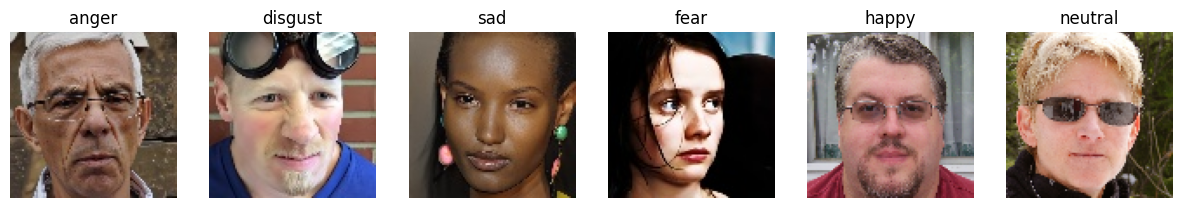

In [11]:
# Function to describe image properties
def get_image_properties(image_path):
    try:
        image = cv2.imread(image_path)

        if image is None:
            return {"Error": "Could not load image"}

        # Check the number of channels
        if len(image.shape) == 2:
            channels = 1      # Grayscale image
        elif len(image.shape) == 3:
            channels = image.shape[2] # Color image (likely RGB or BGR)
        else:
            channels = "Unknown"

        # Calculate properties based on the original image
        height, width = image.shape[:2]
        size = os.path.getsize(image_path)  # File size in bytes

        return {
            "Dimensions": f"{width}x{height}",
            "Amount of channels": channels,
            "File Size (KB)": f"{size / 1024:.2f}"
        }
    except Exception as e:
        print(f"Error al obtener las propiedades de la imagen: {e}")
        return None

print("Visualizing dataset examples...")

# List available classes
classes = os.listdir(train_path)

print(f"\nClasses found: {classes}")

print("\nVisualizing examples from each class with properties:")

# Display an example from each class with properties
fig, axes = plt.subplots(1, len(classes), figsize=(15, 5))

for i, class_name in enumerate(classes):
    class_folder = os.path.join(train_path, class_name)

    if os.path.isdir(class_folder):
        # Get a random image from the class folder
        files = os.listdir(class_folder)
        random_file = random.choice(files)  # Select a random file from the list
        example_image_path = os.path.join(class_folder, random_file)

        image = cv2.imread(example_image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

        # Display the image
        axes[i].imshow(image_rgb)
        axes[i].axis("off")
        axes[i].set_title(class_name)

        # Get and print image properties
        properties = get_image_properties(example_image_path)

        print(f"\nClass: {class_name}")

        for prop, value in properties.items():
            print(f"{prop}: {value}")
plt.show()

## Preparación de los datos para el entrenamiento

In [12]:
# Define common parameters
image_size = (96, 96)  # Example image size
batch_size = 32         # Batch size for loading data
seed = 42              # Random seed for reproducibility
input_shape = (*image_size, 3)

# # Create the training dataset
# train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
#     train_path,
#     validation_split=0.2,  # Reserve 20% for validation
#     subset="training",     # Specify this subset is training data
#     seed=seed,
#     image_size=image_size,
#     batch_size=batch_size
# )

# # Create the validation dataset
# validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
#     train_path,
#     validation_split=0.2,  # Same split as above
#     subset="validation",   # Specify this subset is validation data
#     seed=seed,
#     image_size=image_size,
#     batch_size=batch_size
# )

# # Test dataset
# test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
#     test_path,  # Separate directory for test data
#     image_size=image_size,
#     batch_size=batch_size
# )

# # Inspect the datasets
# class_names = train_dataset.class_names
# print("Class names:", class_names)
# print("Number of classes:", len(class_names))
# print("Size of the batch: ", batch_size)
# print("Image size: ", image_size)
# print("Input shape of the images: ", input_shape)

# Obtaining an example of image size and number of channels
sample_class = os.path.join(train_path, classes[random.randint(0, len(classes)-1)])
random_class_choice = random.choice(os.listdir(sample_class))
sample_img_path = os.path.join(sample_class, random_class_choice)
sample_image = cv2.imread(sample_img_path)

original_img_size = sample_image.shape[:2]
target_img_size = (96, 96)  # Target size for the model

img_channels = 1 if len(sample_image.shape) == 2 else sample_image.shape[2]

input_shape = (*target_img_size, img_channels)

print(f"Attributes to be used alongside the model:")

print(f"Original image size: {original_img_size}")
print(f"Target image size: {target_img_size}")
print(f"Original image channels: {len(sample_image.shape)}")
print(f"Target image channels: {img_channels}")
print(f"Input shape: {input_shape}")

data_augmentation = ImageDataGenerator(
    rotation_range=10,             # Augment rotation
    zoom_range=0.2,                # Increase zoom range
    # shear_range=0.1,               # Increase shear
    horizontal_flip=True,          # Flip images
    width_shift_range=0.2,         # Shift width
    height_shift_range=0.2,        # Shift height
    # brightness_range=[0.8, 1.2],   # Narrow brightness range
    rescale=1.0/255,                # Normalize pixel values
    validation_split=0.2,          # Ensure 20% validation split
    fill_mode='nearest'            # Fill missing pixels
)

print("\nTrain generator:")

train_generator = data_augmentation.flow_from_directory(
    directory=train_path,
    target_size=target_img_size,
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
    subset="training",
    shuffle=True,
    seed=42
)

print("\nValidation generator:")
# Validation data generator
validation_generator = data_augmentation.flow_from_directory(
    directory=train_path,
    target_size=target_img_size,
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

# Test data generator (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

print("\nTest generator:")
test_generator = test_datagen.flow_from_directory(
    directory=test_path,
    target_size=target_img_size,
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
    shuffle=False
)

Attributes to be used alongside the model:
Original image size: (96, 96)
Target image size: (96, 96)
Original image channels: 3
Target image channels: 3
Input shape: (96, 96, 3)

Train generator:
Found 9510 images belonging to 6 classes.

Validation generator:
Found 2376 images belonging to 6 classes.

Test generator:
Found 2976 images belonging to 6 classes.


### Verificacion del balance de clases

In [13]:
# # Contar imágenes por clase en el conjunto de entrenamiento
# train_class_counts = {class_name: 0 for class_name in class_names}

# for batch, labels in train_dataset:
#     for label in labels.numpy():
#         train_class_counts[class_names[label]] += 1

# print("Distribución de clases en el conjunto de entrenamiento:")
# for class_name, count in train_class_counts.items():
#     print(f"{class_name}: {count} imágenes")

# # Contar imágenes por clase en el conjunto de validación
# validation_class_counts = {class_name: 0 for class_name in class_names}

# for batch, labels in validation_dataset:
#     for label in labels.numpy():
#         validation_class_counts[class_names[label]] += 1

# print("\nDistribución de clases en el conjunto de validación:")
# for class_name, count in validation_class_counts.items():
#     print(f"{class_name}: {count} imágenes")

# # Contar imágenes por clase en el conjunto de prueba
# test_class_counts = {class_name: 0 for class_name in class_names}

# for batch, labels in test_dataset:
#     for label in labels.numpy():
#         test_class_counts[class_names[label]] += 1

# print("\nDistribución de clases en el conjunto de prueba:")
# for class_name, count in test_class_counts.items():
#     print(f"{class_name}: {count} imágenes")


# # print("Verificación del balance de clases...")

# # print("\nDiccionario de clases:")
# # # Obtener el mapeo de índices a nombres de clases
# # class_indices = train_generator.class_indices  # Diccionario {nombre_clase: índice_clase}
# # index_to_class = {v: k for k, v in class_indices.items()}  # Invertir el diccionario

# # # Contar las clases
# # class_counts = Counter(train_generator.classes)

# # # Ordenar por índice de clase y mostrar con nombres
# # for class_index, count in sorted(class_counts.items()):
# #     class_name = index_to_class[class_index]  # Obtener el nombre asociado al índice
# #     print(f"Clase '{class_name}' (índice {class_index}): {count} muestras")

# # # Verificar si hay clases faltantes
# # expected_classes = set(range(len(class_indices)))
# # missing_classes = expected_classes - set(class_counts.keys())
# # if missing_classes:
# #     missing_class_names = [index_to_class[c] for c in missing_classes if c in index_to_class]
# #     print(f"Advertencia: Las siguientes clases están vacías: {', '.join(missing_class_names)}")
# #     raise ValueError(f"Clases faltantes detectadas: {missing_class_names}. Revisa los directorios.")

# # # Visualización de la distribución
# # class_names = [index_to_class[i] for i in sorted(class_counts.keys())]
# # counts = [class_counts[i] for i in sorted(class_counts.keys())]

# # plt.figure(figsize=(10, 6))
# # plt.bar(class_names, counts, color='skyblue')
# # plt.xlabel('Clases')
# # plt.ylabel('Número de muestras')
# # plt.title('Distribución de clases en el conjunto de entrenamiento')
# # plt.xticks(rotation=45)
# # plt.tight_layout()
# # for i, v in enumerate(counts):
# #   plt.text(i, v + 0.5, str(v), ha='center', fontsize=9)
# # plt.show()

# # # Crear un reporte tabular
# # df = pd.DataFrame(
# #     {
# #     "Clase": class_names,
# #     "Cantidad de Muestras": counts
# #     }
# # )

# # print("\nReporte tabular de la distribución de clases:")
# # print(df)

### Cálculo de pesos del desbalance de clases

In [14]:
# # Identify class indices and counts
# total_samples = sum(class_counts)

# # Compute class weights using compute_class_weight
# class_weights = compute_class_weight(
#     class_weight='balanced',
#     classes=np.unique(train_generator.classes),
#     y=train_generator.classes
# )

# # Map weights to dictionary
# class_weights_dict = {i: w for i, w in enumerate(class_weights)}
# print(f"Class weights: {class_weights_dict}")

# # # Adjust weights for underrepresented classes
# # underrepresented_classes = [index for index, count in enumerate(class_counts) if count < total_samples / num_classes]

# # # Boost weights for underrepresented classes
# # boost_factor = 1.25  # Increase this factor for more emphasis
# # for class_index in underrepresented_classes:
# #     class_weights_dict[class_index] *= boost_factor

# # Optional: Print the adjusted weights for debugging
# print("Adjusted class weights:")
# for class_index, weight in class_weights_dict.items():
#     class_name = list(train_generator.class_indices.keys())[list(train_generator.class_indices.values()).index(class_index)]
#     print(f"Class: {class_name}, Weight: {weight:.2f}")

# # Validar el generador de entrenamiento con pesos
# if not train_generator.class_indices or len(train_generator.classes) == 0:
#     raise ValueError("El generador no tiene clases o no contiene datos. Verifica la configuración del dataset.")

# def balanced_data_generator(generator):
#     while True:
#         data, labels = generator.next()
#         # Find classes with fewer samples
#         underrepresented_classes = np.where(labels.sum(axis=0) < np.mean(labels.sum(axis=0)))[0]
#         # Duplicate examples from underrepresented classes
#         for cls in underrepresented_classes:
#             indices = np.where(labels[:, cls] == 1)[0]
#             sampled_indices = np.random.choice(indices, size=len(indices) * 2, replace=True)
#             data = np.concatenate([data, data[sampled_indices]], axis=0)
#             labels = np.concatenate([labels, labels[sampled_indices]], axis=0)
#         yield data, labels

# train_dataset = tf.data.Dataset.from_generator(
#     lambda: ((data, labels) for data, labels in train_generator),
#     output_signature=(
#         tf.TensorSpec(shape=(None, input_shape[0], input_shape[1], input_shape[2]), dtype=tf.float32),
#         tf.TensorSpec(shape=(None, num_classes), dtype=tf.float32)
#     )
# ).prefetch(tf.data.AUTOTUNE)

# val_dataset = tf.data.Dataset.from_generator(
#     lambda: ((data, labels) for data, labels in validation_generator),
#     output_signature=(
#         tf.TensorSpec(shape=(None, input_shape[0], input_shape[1], input_shape[2]), dtype=tf.float32),
#         tf.TensorSpec(shape=(None, num_classes), dtype=tf.float32)
#     )
# ).prefetch(tf.data.AUTOTUNE)

# # Collect test data into NumPy arrays
# test_data = []
# test_labels = []

# for data, labels in test_generator:
#     test_data.append(data)
#     test_labels.append(labels)
#     if len(test_data) * batch_size >= test_generator.samples:  # Stop after all samples
#         break

# test_data = np.concatenate(test_data, axis=0)
# test_labels = np.concatenate(test_labels, axis=0)

# # Create a tf.data.Dataset
# test_dataset = tf.data.Dataset.from_tensor_slices(
#     (test_data, test_labels)
#     ).shuffle(1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# for data, labels in train_dataset.take(1):
#     print(f"\nData shape: {data.shape}, Labels shape: {labels.shape}")

# for data, labels in val_dataset.take(1):
#     print(f"\nData shape: {data.shape}, Labels shape: {labels.shape}")

# for data, labels in test_dataset.take(1):
#     print(f"\nData shape: {data.shape}, Labels shape: {labels.shape}")

# # def balanced_data_generator(generator):
# #     while True:
# #         data, labels = next(generator)  # Use `next()` for the generator
# #         # Find classes with fewer samples
# #         underrepresented_classes = np.where(labels.sum(axis=0) < np.mean(labels.sum(axis=0)))[0]
# #         # Duplicate examples from underrepresented classes
# #         for cls in underrepresented_classes:
# #             indices = np.where(labels[:, cls] == 1)[0]
# #             sampled_indices = np.random.choice(indices, size=len(indices) * 2, replace=True)
# #             data = np.concatenate([data, data[sampled_indices]], axis=0)
# #             labels = np.concatenate([labels, labels[sampled_indices]], axis=0)
# #         yield data, labels

In [15]:
num_classes = len(train_generator.class_indices)  # Number of classes from your dataset

train_dataset = tf.data.Dataset.from_generator(
    lambda: ((data, labels) for data, labels in train_generator),
    output_signature=(
        tf.TensorSpec(shape=(None, input_shape[0], input_shape[1], input_shape[2]), dtype=tf.float32),
        tf.TensorSpec(shape=(None, num_classes), dtype=tf.float32)
    )
).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_generator(
    lambda: ((data, labels) for data, labels in validation_generator),
    output_signature=(
        tf.TensorSpec(shape=(None, input_shape[0], input_shape[1], input_shape[2]), dtype=tf.float32),
        tf.TensorSpec(shape=(None, num_classes), dtype=tf.float32)
    )
).prefetch(tf.data.AUTOTUNE)

# Collect test data into NumPy arrays
test_data = []
test_labels = []

for data, labels in test_generator:
    test_data.append(data)
    test_labels.append(labels)
    if len(test_data) * batch_size >= test_generator.samples:  # Stop after all samples
        break

test_data = np.concatenate(test_data, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

# Create a tf.data.Dataset
test_dataset = tf.data.Dataset.from_tensor_slices(
    (test_data, test_labels)
    ).batch(batch_size).prefetch(tf.data.AUTOTUNE)

for data, labels in train_dataset.take(1):
    print(f"\nTrain data shape: {data.shape}, Labels shape: {labels.shape}")

for data, labels in val_dataset.take(1):
    print(f"\nValidation data shape: {data.shape}, Labels shape: {labels.shape}")

for data, labels in test_dataset.take(1):
    print(f"\nTest data shape: {data.shape}, Labels shape: {labels.shape}")


Train data shape: (32, 96, 96, 3), Labels shape: (32, 6)

Validation data shape: (32, 96, 96, 3), Labels shape: (32, 6)

Test data shape: (32, 96, 96, 3), Labels shape: (32, 6)


## Entrenamiento del modelo

### Creación de la arquitectura base del modelo

In [16]:
# Calculate steps per epoch
steps_per_epoch = math.ceil(train_generator.samples / train_generator.batch_size)
validation_steps = math.ceil(validation_generator.samples / validation_generator.batch_size)
total_epochs = 100  # Total number of training epochs
total_steps = total_epochs * steps_per_epoch

print(f"Steps per epoch: {steps_per_epoch}")
print(f"Validation steps: {validation_steps}")
print(f"Number of classes: {num_classes}")

base_model = MobileNetV2(
        weights="imagenet",
        include_top=False,
        input_shape=input_shape
    )

# Update the model
def build_model(base_model):
    print("Building model...")

    print("\nInput shape: ", input_shape)

    l2_rate = 1e-3

    base_model.trainable = False

    for layer in base_model.layers[20:]:
        layer.trainable = True

    inputs = base_model.input

    x = base_model.output

    x = GlobalAveragePooling2D()(x)

    x = BatchNormalization()(x)

    x = Dense(128, kernel_regularizer=l2(l2_rate))(x)
    x = relu(x)
    x = Dropout(0.5)(x)

    x = Dense(64, kernel_regularizer=l2(l2_rate))(x)
    x = relu(x)
    x = Dropout(0.4)(x)

    outputs = Dense(num_classes, activation='softmax')(x)

    return Model(inputs=inputs, outputs=outputs)

Steps per epoch: 298
Validation steps: 75
Number of classes: 6
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
model = build_model(base_model)

custom_lr = CosineDecayRestarts(
    initial_learning_rate=1e-4,
    first_decay_steps=steps_per_epoch * 5,  # Reinicia cada 10 épocas
    t_mul=2.0,  # Doble el tiempo de reinicio después de cada ciclo
    alpha=1e-6  # Tasa mínima
)

model.compile(
        optimizer = AdamW(learning_rate=1e-3),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

model.summary()

Building model...

Input shape:  (96, 96, 3)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 96, 96, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 48, 48, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 48, 48, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 48, 48, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 48, 48, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 48, 48, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 48, 48, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 48, 48, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 48, 48, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 48, 48, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 48, 48, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 48, 48, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 49, 49, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 24, 24, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,435,718 (9.29 MB)

 Trainable params: 2,388,342 (9.11 MB)

 Non-trainable params: 47,376 (185.06 KB)

In [18]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=9,
    restore_best_weights=True,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    'best_val_loss_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',   # Monitorizar la pérdida en validación
    factor=0.1,           # Reducir la tasa de aprendizaje a la mitad
    patience=2,           # Esperar 3 épocas sin mejora
    min_lr=1e-6,           # No reducir por debajo de este valor
    verbose=1
)

class LearningRateLogger(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Access the current learning rate from the optimizer
        lr = self.model.optimizer.learning_rate
        if isinstance(lr, tf.keras.optimizers.schedules.LearningRateSchedule):
            lr = lr(epoch * steps_per_epoch)  # Calculate the current LR based on epoch and steps
        print(f"Epoch {epoch + 1}: Learning rate is {lr.numpy():.6f}")

class IncrementalUnfreezeCallback(tf.keras.callbacks.Callback):
    def __init__(self, base_model, unfreeze_schedule):
        super().__init__()
        self.base_model = base_model
        self.unfreeze_schedule = unfreeze_schedule
        self.already_unfrozen = 0  # Track layers already unfrozen

    def on_epoch_end(self, epoch, logs=None):
        if epoch in self.unfreeze_schedule:
            layers_to_unfreeze = self.unfreeze_schedule[epoch]
            new_unfreeze_count = self.already_unfrozen + layers_to_unfreeze

            for layer in self.base_model.layers[-new_unfreeze_count:]:
                layer.trainable = True

            self.already_unfrozen = new_unfreeze_count  # Update unfrozen layers count
            print(f"Epoch {epoch + 1}: Unfroze {layers_to_unfreeze} additional layers.")

unfreeze_schedule = {10: 10, 20: 10, 30: 15}

callbacks = [
    early_stopping,
    model_checkpoint,
    # LearningRateLogger(),
    IncrementalUnfreezeCallback(base_model, unfreeze_schedule),
    lr_scheduler
]

In [19]:
history = model.fit(
    x = train_dataset,
    verbose=1,
    validation_data=val_dataset,
    epochs=total_epochs,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=callbacks
)

model.save('init_training_cnn_emotions_gomezegui.keras')

with open('init_training_history_gomezegui.json', 'w') as f:
    json.dump(history.history, f)

Epoch 1/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.2707 - loss: 2.5220
Epoch 1: val_loss improved from inf to 4.66608, saving model to best_val_loss_model.keras
298/298 ━━━━━━━━━━━━━━━━━━━━ 109s 227ms/step - accuracy: 0.2709 - loss: 2.5205 - val_accuracy: 0.2799 - val_loss: 4.6661 - learning_rate: 0.0010
Epoch 2/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.4114 - loss: 1.6177
Epoch 2: val_loss did not improve from 4.66608
298/298 ━━━━━━━━━━━━━━━━━━━━ 40s 135ms/step - accuracy: 0.4115 - loss: 1.6173 - val_accuracy: 0.2226 - val_loss: 19.6706 - learning_rate: 0.0010
Epoch 3/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.4727 - loss: 1.4529
Epoch 3: val_loss improved from 4.66608 to 4.26548, saving model to best_val_loss_model.keras
298/298 ━━━━━━━━━━━━━━━━━━━━ 43s 145ms/step - accuracy: 0.4728 - loss: 1.4528 - val_accuracy: 0.3270 - val_loss: 4.2655 - learning_rate: 0.0010
Epoch 4/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0

In [20]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5942 - loss: 1.2373
Test Loss: 1.0254, Test Accuracy: 0.6576


In [21]:
# Generate predictions using the test dataset
predictions = model.predict(test_dataset)
predicted_classes = tf.argmax(predictions, axis=1)

93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


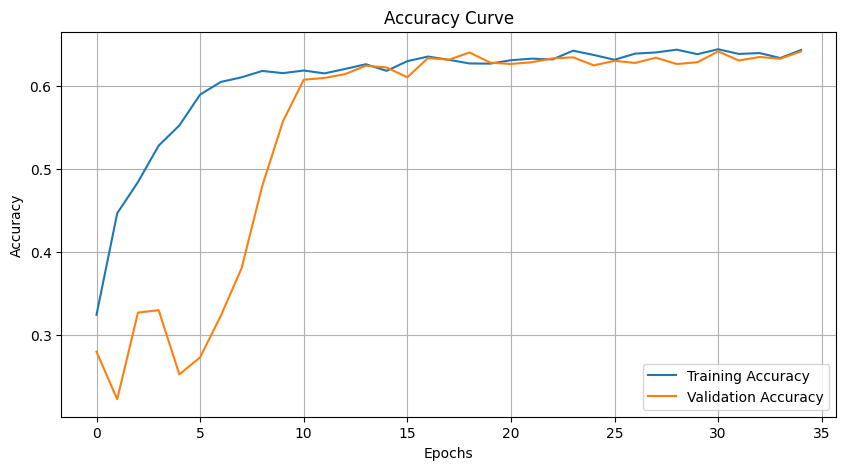

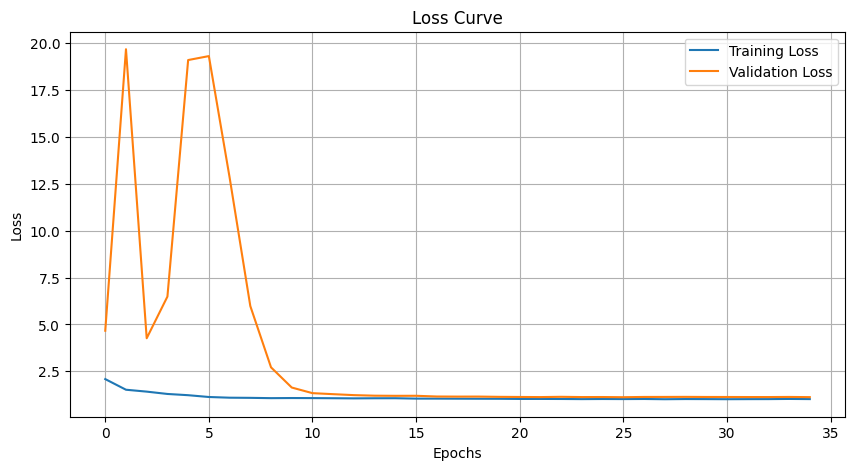

In [22]:
# Extract accuracy and loss values
acc = history.history.get('accuracy', [])
val_acc = history.history.get('val_accuracy', [])
loss = history.history.get('loss', [])
val_loss = history.history.get('val_loss', [])

# Plot accuracy curve
plt.figure(figsize=(10, 5))
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.grid()
plt.show()

# Plot loss curve
plt.figure(figsize=(10, 5))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid()
plt.show()

In [23]:
# Extract true labels from the test dataset
true_labels = tf.concat([y for _, y in test_dataset], axis=0)
true_labels = tf.argmax(true_labels, axis=1).numpy()  # Convert one-hot to integer class

# Generate the classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_classes.numpy(), target_names=list(test_generator.class_indices.keys())))

Classification Report:
              precision    recall  f1-score   support

       anger       0.51      0.49      0.50       496
     disgust       0.57      0.55      0.56       496
        fear       0.58      0.77      0.66       496
       happy       0.94      0.88      0.91       496
     neutral       0.87      0.93      0.90       496
         sad       0.44      0.33      0.38       496

    accuracy                           0.66      2976
   macro avg       0.65      0.66      0.65      2976
weighted avg       0.65      0.66      0.65      2976



Confusion Matrix (Counts):
[[241 101  65   0   0  89]
 [ 90 272  59   7  10  58]
 [ 22  30 382   0   0  62]
 [  0   0   1 436  59   0]
 [  5   2   4  21 460   4]
 [112  70 147   0   1 166]]

Normalized Confusion Matrix:
[[0.49 0.2  0.13 0.   0.   0.18]
 [0.18 0.55 0.12 0.01 0.02 0.12]
 [0.04 0.06 0.77 0.   0.   0.12]
 [0.   0.   0.   0.88 0.12 0.  ]
 [0.01 0.   0.01 0.04 0.93 0.01]
 [0.23 0.14 0.3  0.   0.   0.33]]


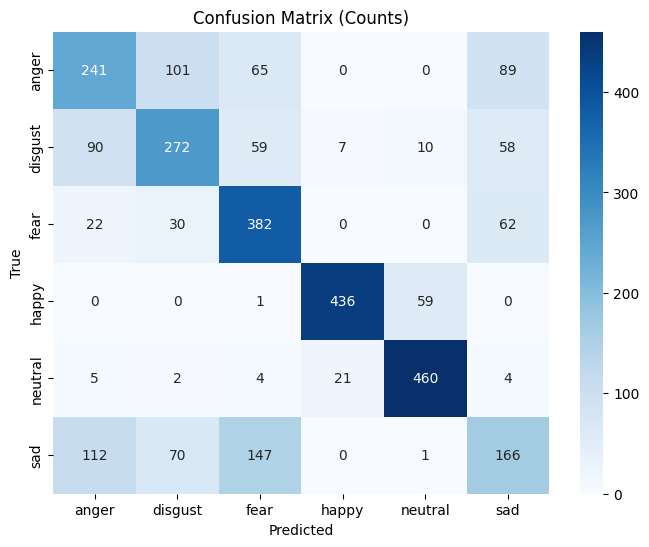

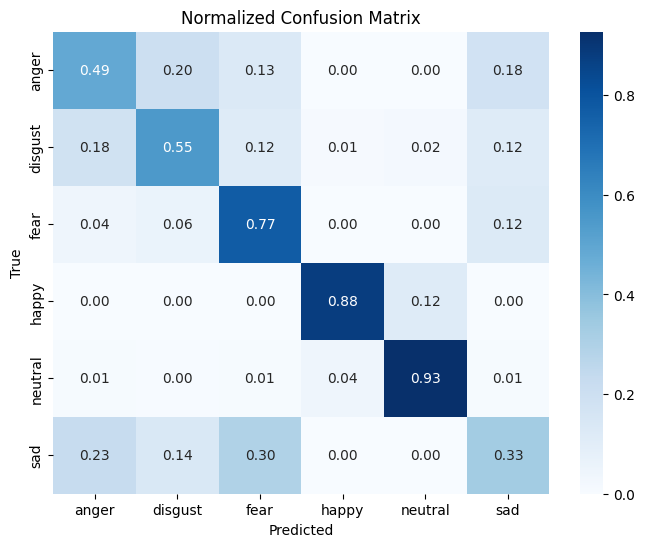

In [24]:
# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_classes.numpy())

# Print the confusion matrix as text
print("Confusion Matrix (Counts):")
print(cm)

# Normalized confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Print normalized confusion matrix as text
print("\nNormalized Confusion Matrix:")
np.set_printoptions(precision=2, suppress=True)  # Adjust precision for cleaner output
print(cm_normalized)

# Plot the confusion matrix (Counts)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=list(test_generator.class_indices.keys()),
            yticklabels=list(test_generator.class_indices.keys()))
plt.title("Confusion Matrix (Counts)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Plot the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(test_generator.class_indices.keys()),
            yticklabels=list(test_generator.class_indices.keys()))
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [25]:
# Calculate metrics
precision = precision_score(true_labels, predicted_classes.numpy(), average='weighted')
recall = recall_score(true_labels, predicted_classes.numpy(), average='weighted')
f1 = f1_score(true_labels, predicted_classes.numpy(), average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.6519
Recall: 0.6576
F1 Score: 0.6510


In [26]:
# # Load the pre-trained model
# model = load_model(
#     'init_training_cnn_emotions_gomezegui.keras'
#     # custom_objects={
#     #     # "SpatialAttention": SpatialAttention,
#     #     "WarmupCosineDecaySchedule": WarmupCosineDecaySchedule
#     # }
# )

# def focal_loss(gamma=2.0, alpha=[0.4, 0.5, 0.5, 0.6, 0.5]):
#     def loss_fn(y_true, y_pred):
#         y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
#         alpha_tensor = tf.constant(alpha, dtype=tf.float32)
#         loss = -y_true * alpha_tensor * tf.pow(1 - y_pred, gamma) * tf.math.log(y_pred)
#         return tf.reduce_mean(loss)
#     return loss_fn

# loss_fn = focal_loss()

# # Unfreeze additional layers in the base model for fine-tuning
# for layer in model.layers[-100:]:  # Unfreeze the last 100 layers
#     layer.trainable = True

# # Define a lower learning rate with a cosine decay schedule for fine-tuning
# fine_tuning_lr = CosineDecay(
#     initial_learning_rate=1e-5,  # Lower starting learning rate
#     decay_steps=15 * steps_per_epoch,  # Decay over multiple steps
#     alpha=1e-6  # Minimum learning rate
# )

# # Create an optimizer for fine-tuning
# fine_tune_optimizer = SGD(learning_rate=fine_tuning_lr, momentum=0.9)

# # Recompile the model with the new optimizer
# model.compile(
#     optimizer=fine_tune_optimizer,
#     loss=loss_fn,  # Ensure this matches the initial training loss
#     metrics=['accuracy']
# )

# # Set up callbacks (reuse the ones from the previous training phase or create new ones)
# fine_tuning_callbacks = [
#     EarlyStopping(
#         monitor='val_loss',
#         patience=10,
#         restore_best_weights=True,
#         verbose=1
#     ),
#     ModelCheckpoint(
#         'fine_tuned_cnn_emotions_gomezegui.keras',
#         monitor='val_loss',
#         save_best_only=True,
#         verbose=1
#     )
# ]

# fine_tuning_callbacks.append(LearningRateLogger())

In [27]:
# # Fine-tune the model
# history_fine_tune = model.fit(
#     train_dataset,
#     validation_data=val_dataset,
#     epochs=50,  # Fine-tuning for additional epochs
#     steps_per_epoch=steps_per_epoch,
#     validation_steps=validation_steps,
#     # class_weight=class_weights_dict,
#     callbacks=fine_tuning_callbacks
# )

# # Save the fine-tuned model
# model.save('fine_tuned_cnn_emotions_gomezegui.keras')

# with open('fine_training_history_gomezegui.json', 'w') as f:
#     json.dump(history_fine_tune.history, f)

In [28]:
# test_loss, test_accuracy = model.evaluate(test_dataset)
# print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

In [29]:
# # Generate predictions using the test dataset
# predictions = model.predict(test_dataset)
# predicted_classes = tf.argmax(predictions, axis=1)

In [30]:
# # Extract accuracy and loss values
# acc = history_fine_tune.history.get('accuracy', [])
# val_acc = history_fine_tune.history.get('val_accuracy', [])
# loss = history_fine_tune.history.get('loss', [])
# val_loss = history_fine_tune.history.get('val_loss', [])

# # Plot accuracy curve
# plt.figure(figsize=(10, 5))
# plt.plot(acc, label='Training Accuracy')
# plt.plot(val_acc, label='Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.title('Accuracy Curve')
# plt.legend()
# plt.grid()
# plt.show()

# # Plot loss curve
# plt.figure(figsize=(10, 5))
# plt.plot(loss, label='Training Loss')
# plt.plot(val_loss, label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Loss Curve')
# plt.legend()
# plt.grid()
# plt.show()

In [31]:
# # Extract true labels from the test dataset
# true_labels = tf.concat([y for _, y in test_dataset], axis=0)
# true_labels = tf.argmax(true_labels, axis=1).numpy()  # Convert one-hot to integer class

# # Generate the classification report
# print("Classification Report:")
# print(classification_report(true_labels, predicted_classes.numpy(), target_names=list(test_generator.class_indices.keys())))

In [32]:
# # Compute the confusion matrix
# cm = confusion_matrix(true_labels, predicted_classes.numpy())

# # Print the confusion matrix as text
# print("Confusion Matrix (Counts):")
# print(cm)

# # Normalized confusion matrix
# cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# # Print normalized confusion matrix as text
# print("\nNormalized Confusion Matrix:")
# np.set_printoptions(precision=2, suppress=True)  # Adjust precision for cleaner output
# print(cm_normalized)

# # Plot the confusion matrix (Counts)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
#             xticklabels=list(test_generator.class_indices.keys()),
#             yticklabels=list(test_generator.class_indices.keys()))
# plt.title("Confusion Matrix (Counts)")
# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.show()

# # Plot the normalized confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
#             xticklabels=list(test_generator.class_indices.keys()),
#             yticklabels=list(test_generator.class_indices.keys()))
# plt.title('Normalized Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

In [33]:
# # Calculate metrics
# precision = precision_score(true_labels, predicted_classes.numpy(), average='weighted')
# recall = recall_score(true_labels, predicted_classes.numpy(), average='weighted')
# f1 = f1_score(true_labels, predicted_classes.numpy(), average='weighted')

# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1 Score: {f1:.4f}")